<!-- # EDA -->
<div style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>1. EDA</b>
    </h1>

</div>

In [1]:
#importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import amp_pd_peptide
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

<div style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.1 Reading Data
    </h3>

</div>

In [2]:

clinical_data = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv")
sup_clinical_data = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv")
peptides_data = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv")
proteins_data = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv")

<div style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.2 Data Overview
    </h3>

</div>

In [3]:
#clinical data overview

clinical_data.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


In [4]:
clinical_data.describe()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,2615.000000,2615.000000,2614.000000,2613.00000,2590.000000,1577.000000
mean,32651.743786,31.190822,7.110559,6.74359,19.421236,1.861763
std,18535.758700,25.199053,5.525955,6.32323,15.000289,3.022112
min,55.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,16574.000000,10.500000,3.000000,1.00000,6.000000,0.000000
50%,29417.000000,24.000000,6.000000,5.00000,19.000000,0.000000
75%,50611.000000,48.000000,10.000000,10.00000,29.000000,3.000000
max,65043.000000,108.000000,33.000000,40.00000,86.000000,20.000000


In [5]:
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2615 non-null   object 
 1   patient_id                           2615 non-null   int64  
 2   visit_month                          2615 non-null   int64  
 3   updrs_1                              2614 non-null   float64
 4   updrs_2                              2613 non-null   float64
 5   updrs_3                              2590 non-null   float64
 6   updrs_4                              1577 non-null   float64
 7   upd23b_clinical_state_on_medication  1288 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 163.6+ KB


In [6]:
sup_clinical_data.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN


In [7]:
sup_clinical_data.describe()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,2223.000000,2223.000000,2010.000000,2009.000000,2218.000000,1295.000000
mean,32478.016194,12.910481,5.684080,6.507715,22.917944,0.840154
std,18637.562796,13.060532,4.366964,4.968132,12.342596,1.860247
min,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16703.000000,0.000000,2.000000,2.000000,14.000000,0.000000
50%,32915.000000,6.000000,5.000000,5.000000,22.000000,0.000000
75%,47243.000000,24.000000,8.000000,10.000000,31.000000,0.000000
max,65530.000000,36.000000,27.000000,34.000000,72.000000,12.000000


In [8]:
sup_clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2223 non-null   object 
 1   patient_id                           2223 non-null   int64  
 2   visit_month                          2223 non-null   int64  
 3   updrs_1                              2010 non-null   float64
 4   updrs_2                              2009 non-null   float64
 5   updrs_3                              2218 non-null   float64
 6   updrs_4                              1295 non-null   float64
 7   upd23b_clinical_state_on_medication  1122 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 139.1+ KB


In [9]:
peptides_data.head()

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


In [10]:
peptides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981834 entries, 0 to 981833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   visit_id          981834 non-null  object 
 1   visit_month       981834 non-null  int64  
 2   patient_id        981834 non-null  int64  
 3   UniProt           981834 non-null  object 
 4   Peptide           981834 non-null  object 
 5   PeptideAbundance  981834 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 44.9+ MB


In [11]:
peptides_data.describe()

,visit_month,patient_id,PeptideAbundance
count,981834.000000,981834.000000,9.818340e+05
mean,26.105061,32603.465361,6.428902e+05
std,22.913897,18605.934422,3.377989e+06
min,0.000000,55.000000,1.099850e+01
25%,6.000000,16566.000000,2.817425e+04
50%,24.000000,29313.000000,7.430830e+04
75%,48.000000,49995.000000,2.213388e+05
max,108.000000,65043.000000,1.787520e+08


In [12]:
proteins_data.head()

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0


In [13]:
proteins_data.describe()

,visit_month,patient_id,NPX
count,232741.000000,232741.000000,2.327410e+05
mean,26.099205,32593.881873,2.712077e+06
std,22.874719,18608.479506,2.224155e+07
min,0.000000,55.000000,8.460820e+01
25%,6.000000,16566.000000,2.946440e+04
50%,24.000000,29313.000000,1.135560e+05
75%,48.000000,49995.000000,5.638940e+05
max,108.000000,65043.000000,6.138510e+08


In [14]:
proteins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232741 entries, 0 to 232740
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   visit_id     232741 non-null  object 
 1   visit_month  232741 non-null  int64  
 2   patient_id   232741 non-null  int64  
 3   UniProt      232741 non-null  object 
 4   NPX          232741 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 8.9+ MB


In [15]:
#checking for null values in clinical data
print(clinical_data.isna().sum())


visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                   1
updrs_2                                   2
updrs_3                                  25
updrs_4                                1038
upd23b_clinical_state_on_medication    1327
dtype: int64


In [16]:
#checking for null values in supplemental clinical data

print(sup_clinical_data.isna().sum())


visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                 213
updrs_2                                 214
updrs_3                                   5
updrs_4                                 928
upd23b_clinical_state_on_medication    1101
dtype: int64


In [17]:
#checking for null values in peptides data

print(peptides_data.isna().sum())


visit_id            0
visit_month         0
patient_id          0
UniProt             0
Peptide             0
PeptideAbundance    0
dtype: int64


In [18]:
#checking for null values in protiens data

print(proteins_data.isna().sum())

visit_id       0
visit_month    0
patient_id     0
UniProt        0
NPX            0
dtype: int64


In [19]:
clinical_data['updrs_1'] = clinical_data['updrs_1'].fillna(clinical_data['updrs_1'].median())
clinical_data['updrs_2'] = clinical_data['updrs_2'].fillna(clinical_data['updrs_2'].median())
clinical_data['updrs_3'] = clinical_data['updrs_3'].fillna(clinical_data['updrs_3'].median())
clinical_data['upd23b_clinical_state_on_medication'] = clinical_data['upd23b_clinical_state_on_medication'].fillna('Missing')

<div style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.3 Clinical Data Analysis
    </h3>

</div>

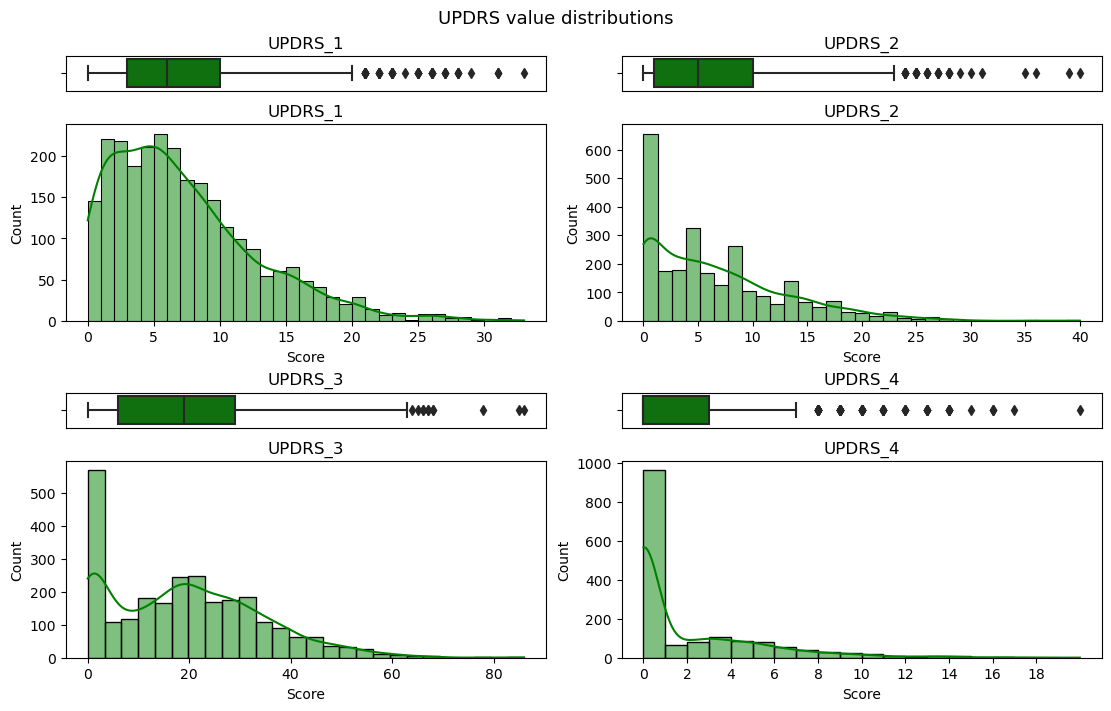

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["green", "yellow", "orange"]
sns.set_palette(sns.color_palette(colors))

f, axes = plt.subplots(4, 2, layout="constrained",
                        gridspec_kw={"height_ratios": (.15, .85, .15, .85)}, figsize=(11, 7))

f.suptitle('UPDRS value distributions', fontsize=13)

splot = sns.boxplot(ax=axes[0][0], x=clinical_data['updrs_1'])
splot.axes.get_xaxis().set_visible(False)
splot.set_title('UPDRS_1')

splot = sns.boxplot(ax=axes[0][1], x=clinical_data['updrs_2'])
splot.axes.get_xaxis().set_visible(False)
splot.set_title('UPDRS_2')

splot = sns.boxplot(ax=axes[2][0], x=clinical_data['updrs_3'])
splot.axes.get_xaxis().set_visible(False)
splot.set_title('UPDRS_3')

splot = sns.boxplot(ax=axes[2][1], x=clinical_data['updrs_4'])
splot.axes.get_xaxis().set_visible(False)
splot.set_title('UPDRS_4')

splot = sns.histplot(ax=axes[1][0], x=clinical_data['updrs_1'], kde=True, alpha=0.5, ec='black')
splot.set_xlabel('Score')
splot.set_ylabel('Count')
splot.set_title('UPDRS_1')

splot = sns.histplot(ax=axes[1][1], x=clinical_data['updrs_2'], kde=True, alpha=0.5, ec='black')
splot.set_xlabel('Score')
splot.set_ylabel('Count')
splot.set_title('UPDRS_2')

splot = sns.histplot(ax=axes[3][0], x=clinical_data['updrs_3'], kde=True, alpha=0.5, ec='black')
splot.set_xlabel('Score')
splot.set_ylabel('Count')
splot.set_title('UPDRS_3')

splot = sns.histplot(ax=axes[3][1], x=clinical_data['updrs_4'], kde=True, bins=range(0, 20), alpha=0.5, ec='black')
splot.set_xticks(range(0, 20, 2))
splot.set_xlabel('Score')
splot.set_ylabel('Count')
splot.set_title('UPDRS_4')


plt.show()


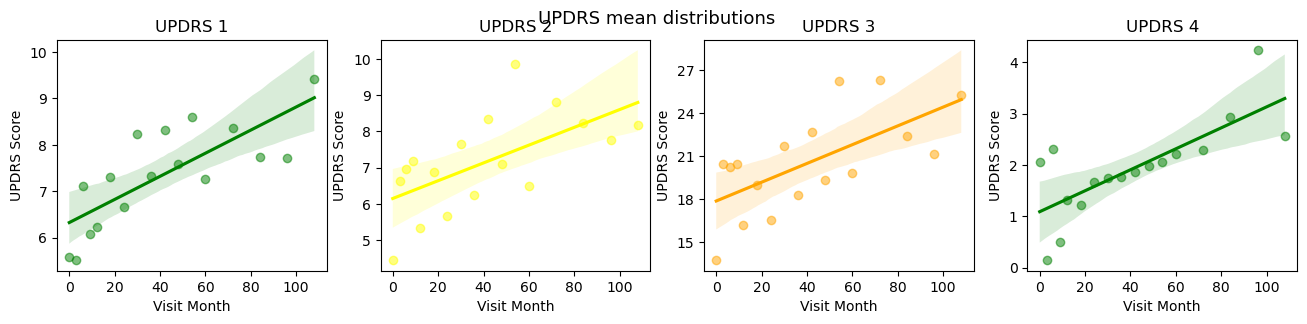

In [21]:
from matplotlib.ticker import MaxNLocator

clinical_data.groupby('visit_month').mean()['updrs_1']

f, axes = plt.subplots(1, 4, figsize=(16, 3))

f.suptitle('UPDRS mean distributions', fontsize=13)

splot = sns.regplot(ax=axes[0], x='visit_month', y='updrs_1', data=clinical_data.groupby('visit_month', as_index=False).mean(),
                    color='green', scatter_kws={'alpha': 0.5})
splot.set_xlabel('Visit Month')
splot.set_ylabel('UPDRS Score')
splot.set_title('UPDRS 1')

splot = sns.regplot(ax=axes[1], x='visit_month', y='updrs_2', data=clinical_data.groupby('visit_month', as_index=False).mean(),
                    color='yellow', scatter_kws={'alpha': 0.5})
splot.set_xlabel('Visit Month')
splot.set_ylabel('UPDRS Score')
splot.set_title('UPDRS 2')

splot = sns.regplot(ax=axes[2], x='visit_month', y='updrs_3', data=clinical_data.groupby('visit_month', as_index=False).mean(),
                    color='orange', scatter_kws={'alpha': 0.5})
splot.set_xlabel('Visit Month')
splot.set_ylabel('UPDRS Score')
splot.set_title('UPDRS 3')
axes[2].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[2].locator_params(axis='y', nbins=6)

splot = sns.regplot(ax=axes[3], x='visit_month', y='updrs_4', data=clinical_data.groupby('visit_month', as_index=False).mean(),
                    color='green', scatter_kws={'alpha': 0.5})
splot.set_xlabel('Visit Month')
splot.set_ylabel('UPDRS Score')
splot.set_title('UPDRS 4')

plt.show()


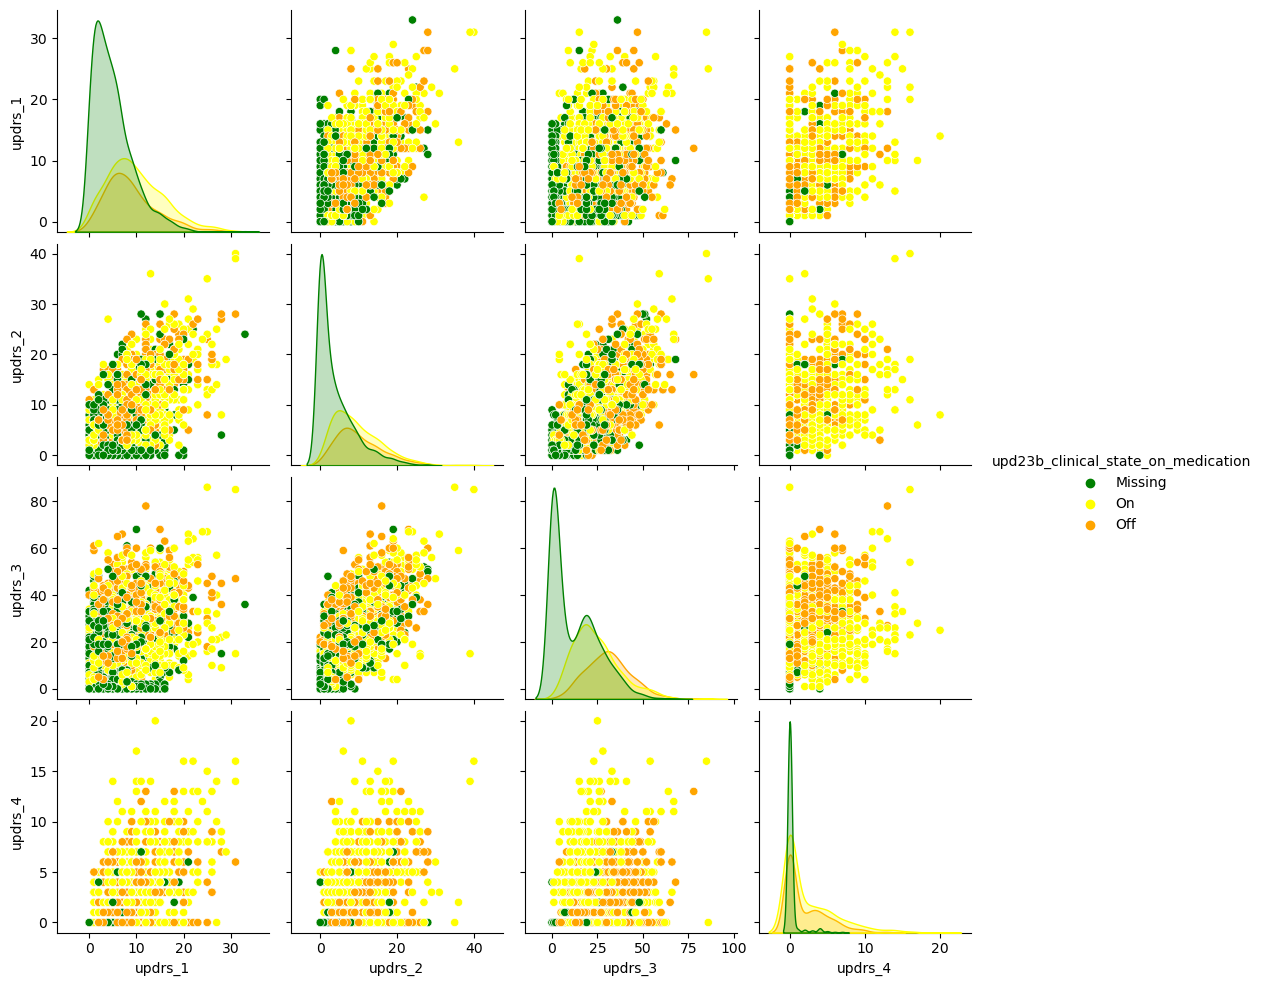

In [22]:
sns.pairplot(clinical_data[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4','upd23b_clinical_state_on_medication']], hue="upd23b_clinical_state_on_medication")


<div style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.4 Protiens Data Analysis
    </h3>

</div>

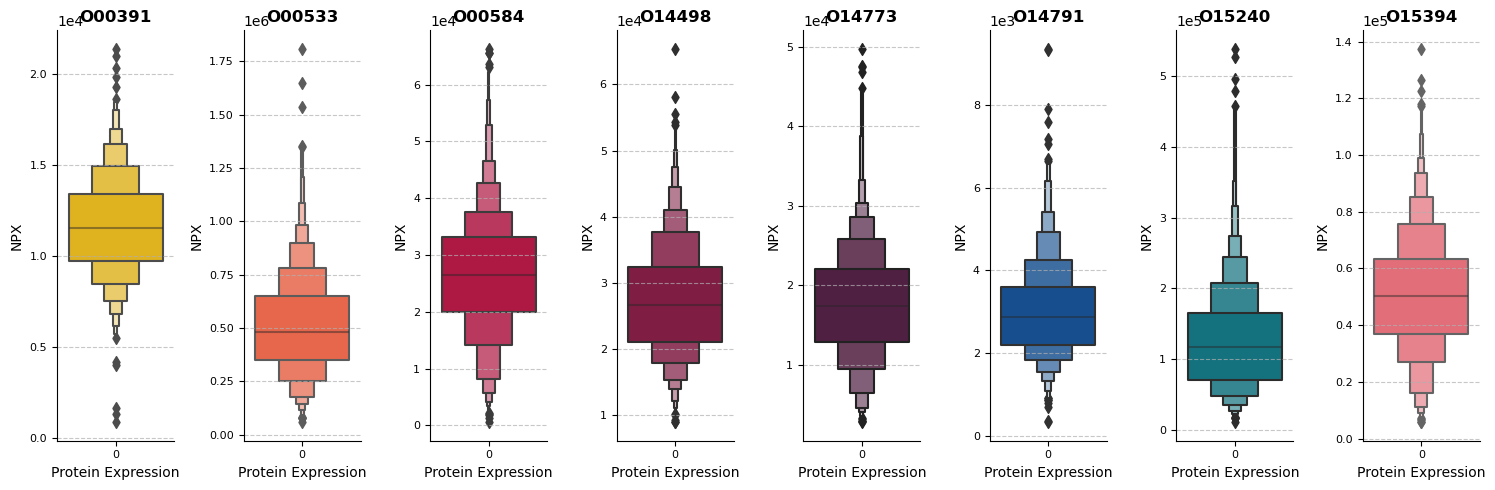

In [23]:
proteins = proteins_data['UniProt'].unique()
examine_proteins = 8

fig, axes = plt.subplots(1, 8, figsize=(15, 5))

colors = ["#FFC300", "#FF5733", "#C70039", "#900C3F", "#581845", "#034EA2", "#028090", "#F45B69"]

for i in range(examine_proteins):
    
    ax = plt.subplot(1, 8, i + 1)
    splot = sns.boxenplot(proteins_data[proteins_data['UniProt'] == proteins[i]]['NPX'].values, color=colors[i])
    ax.set_title(proteins[i], fontsize=12, fontweight='bold')
    ax.set_xlabel('Protein Expression', fontsize=10)
    ax.set_ylabel('NPX', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    sns.despine(top=True, right=True)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()


<div style = "height: 210px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="padding: 10px;
              color:black;
               ">
        <b>Insights :</b> 
        <br></br>
       
 <i>The majority of patients with early disease get poor scores (for example, seems like many of them have 0 score for motor activites). Due to the terrible effects that sickness has on their health, many of them do not live long enough to receive high marks.
In each category, there are a few outliers (very high scores). Even before NaN values are filled, the majority of UPDRS4 values are zero.</i>
    </h3>

</div>


<div style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>2. Training The Model</b>
    </h1>

</div>

In [24]:
train = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv")
print(train.shape)
train.head()

(2615, 8)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


In [25]:
temp_proteins = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv")

In [26]:
temp_proteins = temp_proteins.pivot(index=['visit_id', 'visit_month', 'patient_id'], 
          columns='UniProt', values='NPX').reset_index().rename_axis(None, axis=1)

In [27]:
temp_proteins = temp_proteins.dropna(axis=1).drop(columns=['visit_month', 'patient_id'])

In [28]:
merged_df = train.merge(temp_proteins, how='left', on='visit_id').dropna(subset=['O15240'])
print(merged_df.shape)
merged_df.head()

(1068, 35)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,O15240,P01009,...,P02790,P05090,P06396,P07602,P10909,P23142,P41222,Q12805,Q92520,Q9UHG2
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,177775.0,14415900.0,...,4774060.0,9137820.0,2607410.0,1401860.0,11575700.0,1673460.0,33921600.0,1611130.0,982965.0,408698.0
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN,165638.0,13330800.0,...,5627420.0,8411730.0,2183310.0,1321860.0,10062500.0,1644680.0,34435000.0,1483200.0,860236.0,369870.0
4,55_12,55,12,10.0,10.0,41.0,0.0,On,151073.0,13225500.0,...,5953560.0,8682640.0,2792590.0,1496970.0,10753700.0,1916350.0,37906600.0,1547140.0,969345.0,318553.0
8,55_36,55,36,17.0,18.0,51.0,0.0,On,101056.0,13855000.0,...,6672980.0,9146830.0,2871610.0,1424390.0,11943000.0,1879000.0,32773700.0,1725030.0,910437.0,377550.0
15,942_6,942,6,8.0,2.0,21.0,NaN,NaN,160526.0,13667800.0,...,5755200.0,5415620.0,1636600.0,1090240.0,6855660.0,1085970.0,26674400.0,637932.0,639154.0,306621.0


In [29]:
FEATURES = merged_df.iloc[:, 8:].columns.tolist()
merged_df.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,O15240,P01009,...,P02790,P05090,P06396,P07602,P10909,P23142,P41222,Q12805,Q92520,Q9UHG2
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,177775.0,14415900.0,...,4774060.0,9137820.0,2607410.0,1401860.0,11575700.0,1673460.0,33921600.0,1611130.0,982965.0,408698.0
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN,165638.0,13330800.0,...,5627420.0,8411730.0,2183310.0,1321860.0,10062500.0,1644680.0,34435000.0,1483200.0,860236.0,369870.0
4,55_12,55,12,10.0,10.0,41.0,0.0,On,151073.0,13225500.0,...,5953560.0,8682640.0,2792590.0,1496970.0,10753700.0,1916350.0,37906600.0,1547140.0,969345.0,318553.0
8,55_36,55,36,17.0,18.0,51.0,0.0,On,101056.0,13855000.0,...,6672980.0,9146830.0,2871610.0,1424390.0,11943000.0,1879000.0,32773700.0,1725030.0,910437.0,377550.0
15,942_6,942,6,8.0,2.0,21.0,NaN,NaN,160526.0,13667800.0,...,5755200.0,5415620.0,1636600.0,1090240.0,6855660.0,1085970.0,26674400.0,637932.0,639154.0,306621.0


In [30]:
model = {}
target = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]

for i in target:
        
    temp = train.dropna(subset=[i]) 
    
    X = temp['visit_month']
    y = temp[i]
        
    trained = LinearRegression().fit(X.values.reshape(-1, 1), y)
    
    model[i] = trained

In [31]:
xgb_model = {}
target = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]

for i in target:
        
    temp = merged_df.dropna(subset=[i]).copy()
    
    X = temp['visit_month']
    temp["preds"] = np.ceil(model[i].predict(X.values.reshape(-1, 1)))
    
    X = temp[FEATURES + ['preds']]
    y = temp[i]
    
    xgb = XGBRegressor(max_depth=3, learning_rate=0.01, n_estimators=1000)
    xgb.fit(X, y)
    
    xgb_model[i] = xgb

In [32]:
def get_predictions(my_train, model, xgb_model):

    my_train = my_train.fillna(0)
    
    for u in target:
        
        my_train['result_' + str(u)] = 0
        
        X = my_train["visit_month"]
        
        temp = my_train[FEATURES].copy()
        temp['preds'] = np.ceil(model[u].predict(X.values.reshape(-1, 1)))
        
        if u != 'updrs_4':
            mask = my_train[FEATURES].sum(axis=1) != 0
            my_train.loc[mask, 'result_' + str(u)] = xgb_model[u].predict(temp.loc[mask])
            my_train.loc[~mask, 'result_' + str(u)] = temp.loc[~mask, 'preds']
    
    result = pd.DataFrame()

    for m in [0, 6, 12, 24]:
        for u in [1, 2, 3, 4]:

            temp = my_train[["visit_id", "result_updrs_" + str(u)]].copy()
            temp["prediction_id"] = temp["visit_id"] + "_updrs_" + str(u) + "_plus_" + str(m) + "_months"
            temp["rating"] = temp["result_updrs_" + str(u)]
            temp = temp [['prediction_id', 'rating']]

            result = result.append(temp)            
    result = result.drop_duplicates(subset=['prediction_id', 'rating'])

    return result

In [33]:
get_predictions(merged_df, model, xgb_model).head()

,prediction_id,rating
0,55_0_updrs_1_plus_0_months,8.045822
2,55_6_updrs_1_plus_0_months,6.203111
4,55_12_updrs_1_plus_0_months,6.240037
8,55_36_updrs_1_plus_0_months,9.528761
15,942_6_updrs_1_plus_0_months,4.835308


In [34]:
# initialize the environment
env = amp_pd_peptide.make_env()   
iter_test = env.iter_test()  

<div style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       2.1 Predictions 
    </h3>

</div>

In [35]:
for (test, test_peptides, test_proteins, sample_submission) in iter_test:
    
    test_proteins = test_proteins.pivot(index=['visit_id', 'visit_month', 'patient_id'], 
          columns='UniProt', values='NPX').reset_index().rename_axis(None, axis=1).drop(columns=['visit_month', 'patient_id'])
    
    merged_df = test.merge(test_proteins, how='left', on='visit_id')
    
    for col in FEATURES:
        if col not in merged_df.columns:
            merged_df[col] = 0
    
    merged_df = merged_df[['visit_id', 'visit_month', 'patient_id'] + FEATURES]
    
    merged_df[FEATURES] = merged_df[FEATURES].fillna(0)
    
    result = get_predictions(merged_df, model, xgb_model)
    
    print(result)
    env.predict(result)   


This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.
                    prediction_id     rating
0    3342_0_updrs_1_plus_0_months   7.000000
4   50423_0_updrs_1_plus_0_months   7.127059
0    3342_0_updrs_2_plus_0_months   6.000000
4   50423_0_updrs_2_plus_0_months   6.017491
0    3342_0_updrs_3_plus_0_months  17.000000
4   50423_0_updrs_3_plus_0_months  18.873299
0    3342_0_updrs_4_plus_0_months   0.000000
4   50423_0_updrs_4_plus_0_months   0.000000
0    3342_0_updrs_1_plus_6_months   7.000000
4   50423_0_updrs_1_plus_6_months   7.127059
0    3342_0_updrs_2_plus_6_months   6.000000
4   50423_0_updrs_2_plus_6_months   6.017491
0    3342_0_updrs_3_plus_6_months  17.000000
4   50423_0_updrs_3_plus_6_months  18.873299
0    3342_0_updrs_4_plus_6_months   0.000000
4   50423_0_updrs_4_plus_6_months   0.000000
0   3342_0_updrs_1_plus_12_months   7.000000
4  50423_0_updrs_1_plus_12_months   7.127059
0   3342_0_updrs_2_p

<div style = "height: 100px;
  width: 800px;
  background-color: #00f349;">
    <p style="padding: 10px;
              color:black;
              text-align:center;">
        <b>Thank you for reading. <br></br> Please do upvote if you liked the notebook If you have any suggestions please let me know<b>
    </p>

</div>